In [26]:
import hdbscan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [27]:
df = pd.read_hdf('data/latent_spaces.h5')
latent_space = np.stack(df['latent_space'].values)

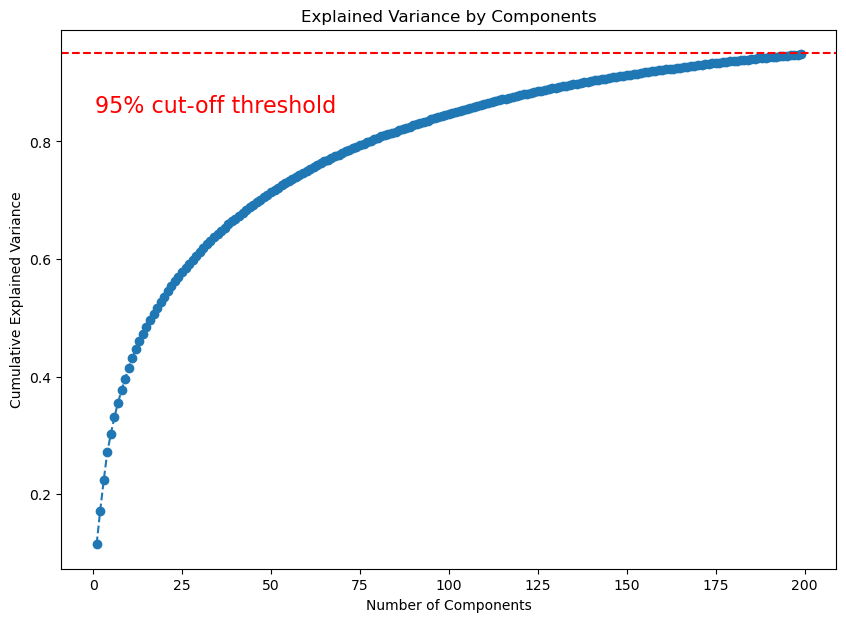

In [33]:
explained_variance = []
for n in range(1,200):  # try 1 to 100 components
    pca = PCA(n_components=n)
    pca.fit(latent_space)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()